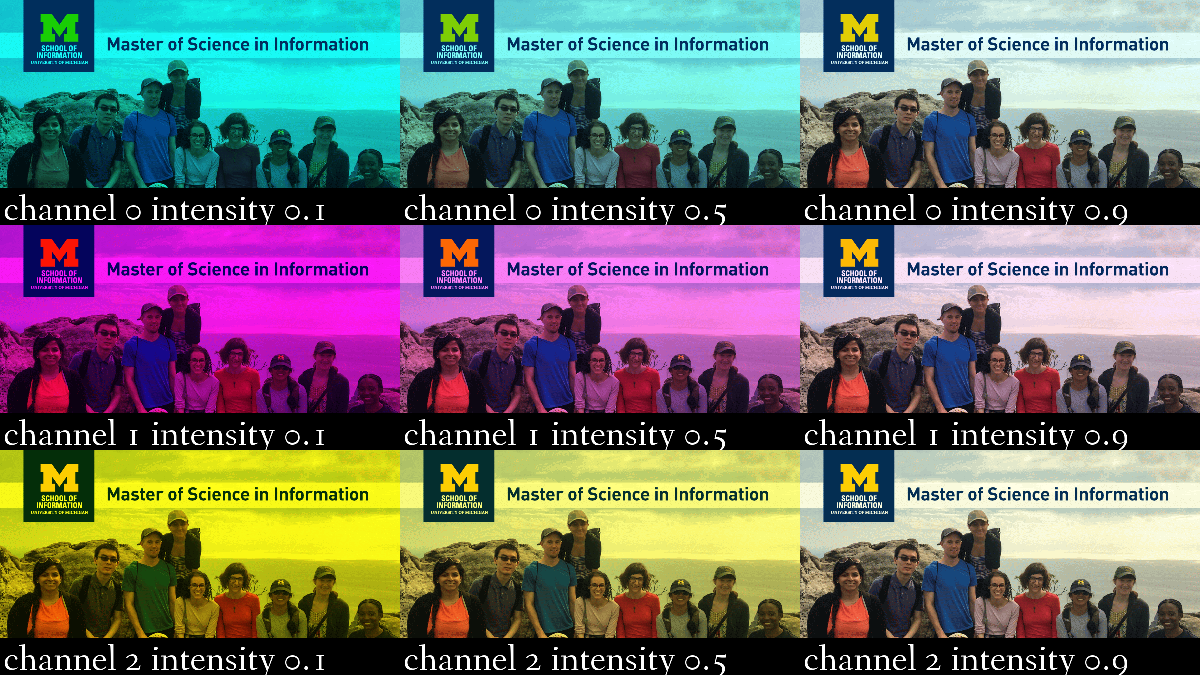

In [1]:
import PIL
from PIL import Image
from PIL import ImageFont
from IPython.display import display
from PIL import ImageDraw

image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')


R,G,B=0,1,2

def change_color_band(im, band, intensity):
    source = im.split()
    Red, Green, Blue = source[R],source[G],source[B]
    if band == 'R'or band =='Red' or band =='red':         
         Red = source[R].point(lambda x:x*intensity)
         
    elif band == 'G' or band=='Green' or band =='green':
         Green = source[G].point(lambda x:x*intensity) 
         
    elif band == 'B' or band=='Blue' or band == 'blue':
         Blue = source[B].point(lambda x:x*intensity)
    
    image = Image.merge(im.mode,(Red,Green,Blue))
    return image

test_image = change_color_band(image,band='Green', intensity = 0.1)


myfont="readonly/fanwood-webfont.ttf"
myfont = ImageFont.truetype(myfont,size=75)
images=[]
intensity_values = [0.1,0.5,0.9]
bands = ['Red','Green','Blue']

for i in range(3):
    for value in intensity_values:
        text = "channel {} intensity {}".format(i,value)
        #print("the color band is {}".format(bands[i]))
        #display(image)
        colored = change_color_band(image,band = bands[i],intensity = value)
        #display(image)
        draw = ImageDraw.Draw(colored)
        draw.rectangle([(0,375),(800,450)],fill='black')
        draw.text((6,372),text,font=myfont)
        images.append(colored)
        

first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)